In [5]:
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(n,r,nx,ny,nz,ax,ay,az):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0

    geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax,ny*ay,nz*az))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=n*n)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    #geometry.append([mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4)])
    return geometry, geometry_lattice

In [9]:
#supercell size
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod radius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
dpml = 1.0
pad = 1.5
cell = mp.Vector3(nx*ax+2*(dpml+pad),ny*ay+2*(dpml+pad),0)

resolution = 30
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.2,0.1)

fcen = 0.5
df = 0.8
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=2000)
#sim.run(until=100)
mp.output_epsilon(sim)
mp.output_hpwr(sim)

-----------
Initializing structure...
     cylinder, center = (2.12132,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (1.41421,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (0.707107,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (0,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-0.707107,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-1.41421,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-2.12132,2.24537,3.39193)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (2.12132,1.02062,3.39193)
          radius 0.0725, height 0.433013, axis (0, -

          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-0.353553,1.63299,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-1.06066,1.63299,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-1.76777,1.63299,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (2.47487,0.408248,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (1.76777,0.408248,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (1.06066,0.408248,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (0.353553,0.408248,1.65988)
          radius 0.0725, height 0.433013, axis (0, -0.942809, -0.333333)
     cylinder, center = (-0.353553,0.408248,1.65988)
    

     cylinder, center = (-0.53033,3.36805,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (-1.23744,3.36805,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (-1.94454,3.36805,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (2.2981,2.1433,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (1.59099,2.1433,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (0.883883,2.1433,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (0.176777,2.1433,4.54663)
          radius 0.0725, height 0.433013, axis (0.816497, 0.471405, -0.333333)
     cylinder, center = (-0.53033,2.1433,4.54663)
          radius 0.0725, height 0.433013, axis 

Meep progress: 160.433333333/2012.5 = 8.0% done in 4.0s, 46.2s to go
Meep progress: 326.4/2012.5 = 16.2% done in 8.0s, 41.3s to go
Meep progress: 490.516666667/2012.5 = 24.4% done in 12.0s, 37.2s to go
Meep progress: 650.683333333/2012.5 = 32.3% done in 16.0s, 33.5s to go
Meep progress: 815.783333333/2012.5 = 40.5% done in 20.0s, 29.3s to go
Meep progress: 980.8/2012.5 = 48.7% done in 24.0s, 25.2s to go
Meep progress: 1145.65/2012.5 = 56.9% done in 28.0s, 21.2s to go
Meep progress: 1310.78333333/2012.5 = 65.1% done in 32.0s, 17.1s to go
Meep progress: 1476.5/2012.5 = 73.4% done in 36.0s, 13.1s to go
Meep progress: 1642.21666667/2012.5 = 81.6% done in 40.0s, 9.0s to go
Meep progress: 1807.41666667/2012.5 = 89.8% done in 44.0s, 5.0s to go
Meep progress: 1973.01666667/2012.5 = 98.0% done in 48.0s, 1.0s to go
ldos0:, 0.1, -7.73741604825
ldos0:, 0.108080808081, 4.61174785345
ldos0:, 0.116161616162, 6.32595865415
ldos0:, 0.124242424242, -0.284598874572
ldos0:, 0.132323232323, -3.83720331385


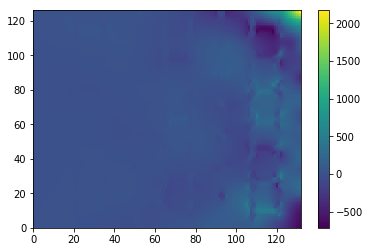

In [4]:
import matplotlib.pyplot as plt
plt.pcolor(sim.get_array(center=mp.Vector3(0,0,0), size=mp.Vector3(nx*ax,0,nz*az), component=mp.Ez))
plt.colorbar()
plt.show()

In [ ]:
from __future__ import division
#supercell size
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod radius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
dpml = 0.5
cell = mp.Vector3(nx*ax+2*dpml,ny*ay+2*dpml,nz*az+2*dpml) 

Th = 100
resolution = 15
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.2,0.1,0.3)

fcen = 0.5
df = 0.8
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez, center=pos)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry, eps_averaging=False,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, df, 100), until_after_sources=Th)
#sim.output_epsilon()

In [ ]:
sim.ldos_data

In [ ]:
%%writefile PIT.py
#%The supercell gemoetry
import math
import meep as mp

#na = 1
#r = 0.0725
#n = math.sqrt(32)
def DiamondLattice(n,r,nx,ny,nz,ax,ay,az):
    #
    L = math.sqrt(3)/4.0
    hs = math.sqrt(3)/12.0

    geometry_lattice = mp.Lattice(size=mp.Vector3(nx*ax,ny*ay,nz*az))
    #v1 = mp.Vector3(1)

    #displace vector to fill the whole supercell
    v2 = mp.Vector3(0.5*ax,0.5*ay,0)
    v1 = mp.Vector3(0,ay*1.0/3.0,az*1.0/3.0)
    v5 = mp.Vector3(ax*0.5,ay*5.0/6.0,az*1.0/3.0)
    v3 = mp.Vector3(ax*0.5,ay*1.0/6.0,az*2.0/3.0)
    v4 = mp.Vector3(0,ay*2.0/3.0,az*2.0/3.0)

    m = mp.Medium(epsilon=n*n)
    #center of the four supercell rod
    c1 = mp.Vector3(0,-math.sqrt(6)/12,-hs/2)
    c2 = mp.Vector3(math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c3 = mp.Vector3(-math.sqrt(2)/8,math.sqrt(6)/24,-hs/2)
    c4 = mp.Vector3(0,0,L/2)
    geometry = [mp.Cylinder(center=c1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v1,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v1,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v1,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v1,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v2,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v2,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v2,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v2,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v3,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v3,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v3,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v3,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v4,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v4,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v4,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v4,radius=r, material=m, height=L, axis=c4),
            mp.Cylinder(center=c1+v5,radius=r, material=m, height=L, axis=c1),
            mp.Cylinder(center=c2+v5,radius=r, material=m, height=L, axis=c2),
            mp.Cylinder(center=c3+v5,radius=r, material=m, height=L, axis=c3),
            mp.Cylinder(center=c4+v5,radius=r, material=m, height=L, axis=c4)]

    geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry, ax,ay,az)
    #geometry.append([mp.Cylinder(center=c4,radius=r, material=mp.air, height=L, axis=c4)])
    return geometry, geometry_lattice

#supercell size
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod raius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)
cell = mp.Vector3(nx*ax,ny*ay,nz*az)

Th = 100
ITER = 1
resolution = 15
dpml = 1
pml_layers = [mp.PML(dpml)]
pos = mp.Vector3(0.1)
for li in range(0,ITER):
    fcen = (li+1)*0.05+0.6
    df = fcen/10.0
    #sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez,
    #                         center=pos)]
    #symmetries = [mp.Mirror(mp.Y)]
    sim = mp.Simulation(cell_size=cell,
                        geometry=geometry,
                        boundary_layers=pml_layers,
                        resolution=resolution)
    sim.run(mp.dft_ldos(fcen, 0, 1), until_after_sources=Th)

In [ ]:
#mpb run with new func
from meep import mpb
nx = 7
ny = 4
nz = 3
r = 0.0725 #rod raius
n = math.sqrt(32) #rod refractive index
#lattice vectors
ax = math.sqrt(2)/2.0
ay = math.sqrt(6)/2.0
az = math.sqrt(3)
#get the geometry and cell
geometry,geometry_lattice=DiamondLattice(n,r,nx,ny,nz,ax,ay,az)


k_points = [mp.Vector3()]
ms = mpb.ModeSolver(num_bands=1,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=15,
                    mesh_size = 3)
ms.run()
ms.output_epsilon()

In [ ]:
!h5tovtk epsilon.h5

In [ ]:
7*ax

In [ ]:
f

In [ ]:
#tutorial 
from __future__ import division

import math
import meep as mp
import argparse


resolution = 20
sxy = 2
dpml = 1
sxy = sxy + 2 * dpml
cell = mp.Vector3(sxy, sxy, sxy)

pml_layers = [mp.PML(dpml)]
a = 1
t = 0.1
geometry = [mp.Block(mp.Vector3(a + 2 * t, a + 2 * t, a + 2 * t), material=mp.metal),
            mp.Block(mp.Vector3(a, a, a), material=mp.air)]

w = 0.3
geometry.append(mp.Block(center=mp.Vector3(a / 2), size=mp.Vector3(2 * t, w, sxy),
                            material=mp.air))

fcen = math.sqrt(0.5) / a
df = 0.2
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df), component=mp.Ez,
                        center=mp.Vector3(0.1))]

symmetries = [mp.Mirror(mp.Y)]

Th = 100

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=sources,
                    symmetries=symmetries,
                    resolution=resolution)
sim.run(mp.dft_ldos(fcen, 0, 1), until_after_sources=Th)
#h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)
#sim.run(mp.after_sources(h), until_after_sources=Th)

#m = h.modes[0]
#f = m.freq
#Q = m.Q
#Vmode = 0.25 * a * a
#print("ldos0:, {}".format(Q / Vmode / (2 * math.pi * f * math.pi * 0.5)))


In [ ]:
h.modes